In [3]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [4]:
app = Flask(__name__)

In [5]:
# bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore
playstore = pd.read_csv('data/googleplaystore.csv')


In [6]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
# Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)
playstore.drop_duplicates(subset = 'App', keep = 'first') 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
# bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar
playstore.drop([10472], inplace=True)

In [9]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
playstore[playstore['Type'] == 'Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [11]:
playstore['Content Rating'] = playstore['Content Rating'].astype('category')

In [12]:
playstore['Android Ver'] = playstore['Android Ver'].astype('category')

In [13]:
# Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+',''))

In [14]:
# Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [15]:
# Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

playstore.Price = playstore.Price.apply(lambda x: x.replace('$',' '))
playstore['Price'] = playstore['Price'].astype('float64')


In [16]:
playstore.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size               float64
Installs            object
Type                object
Price              float64
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver       category
dtype: object

In [17]:
# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore[['Reviews', 'Size', 'Installs']] = playstore[['Reviews', 'Size', 'Installs']].astype('int64')

In [18]:
playstore.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver       category
dtype: object

In [19]:
df2 = playstore.copy()
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
# Statistik
# Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
# Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
# sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category 
top_category = pd.crosstab(
    index=df2['Category'],
    columns='Jumlah'
).sort_values(by='Jumlah', ascending=False).reset_index()
top_category.loc[0]['Jumlah']

1972

In [21]:
top_category = pd.crosstab(
    index=df2['Category'],
    columns='Jumlah'
).sort_values(by='Jumlah', ascending=False).reset_index()
top_category

col_0,Category,Jumlah
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


In [22]:
top_category.iloc[0,1]
top_category.iloc[0,0]


'FAMILY'

In [23]:
top_category['Jumlah'].loc[0]

1972

In [24]:
stats = {'most_categories': top_category.iloc[0,0],
        'total': top_category.iloc[0,1]}
stats

{'most_categories': 'FAMILY', 'total': 1972}

In [25]:
rev_table = df2.groupby(['Category', 'App']).agg({'Reviews':'sum', 'Rating':'mean'})\
.sort_values(by=['Reviews', 'Category'], ascending=False).head(10)


In [26]:
stats = {
        # Ini adalah bagian untuk melengkapi konten value box ,
        # most category mengambil nama category paling banyak mengacu pada dataframe top_category
        # total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe top_category
        'most_categories': top_category.iloc[0,0],
        'total': top_category.iloc[0,1],
        # rev_table adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna. 
        # Silahkan melakukan agregasi data yang tepat menggunakan groupby untuk menampilkan 10 aplikasi yang diurutkan berdasarkan 
        # jumlah Review pengguna. Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
        # Agregasi Anda dinilai benar jika hasilnya sama dengan tabel yang terlampir pada file ini
        'rev_table' : df2.groupby(['Category', 'App']).agg({'Reviews':'sum', 'Rating':'mean'}).sort_values(by=['Reviews', 'Category'], ascending=False).head(10).to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
    }

In [27]:
cat_order = df2.groupby('Category').agg({'Reviews': 'sum'}).rename({'Reviews':'Total'}, axis=1)\
.sort_values(by='Total', ascending=False).head()
cat_order

,Total
Category,
GAME,1585422349
COMMUNICATION,815462260
SOCIAL,621241422
FAMILY,410226330
TOOLS,273185044


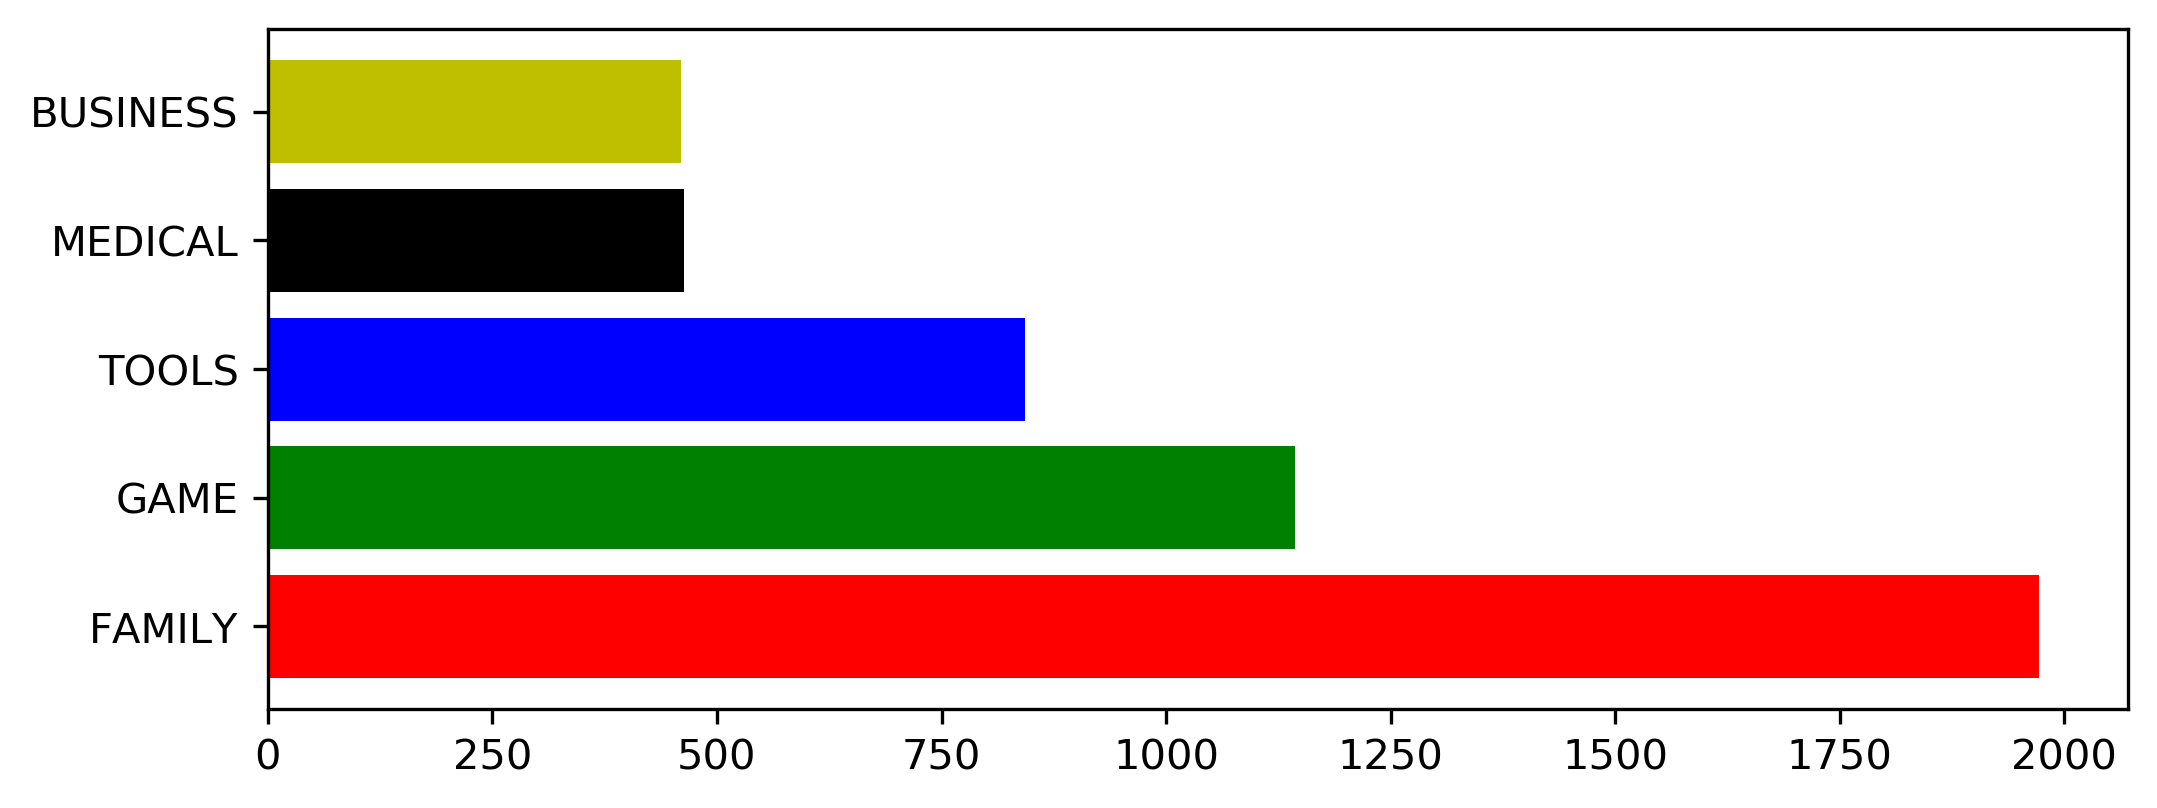

In [28]:
cat_order = pd.crosstab(
    index=df2['Category'],
    columns='Total'
).sort_values(by='Total', ascending=False).reset_index().head()
X = cat_order['Category']
Y = cat_order['Total']

my_colors = 'rgbkymc'

# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X,Y,color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

# bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
# variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
# halaman html
result = str(figdata_png)[2:-1]

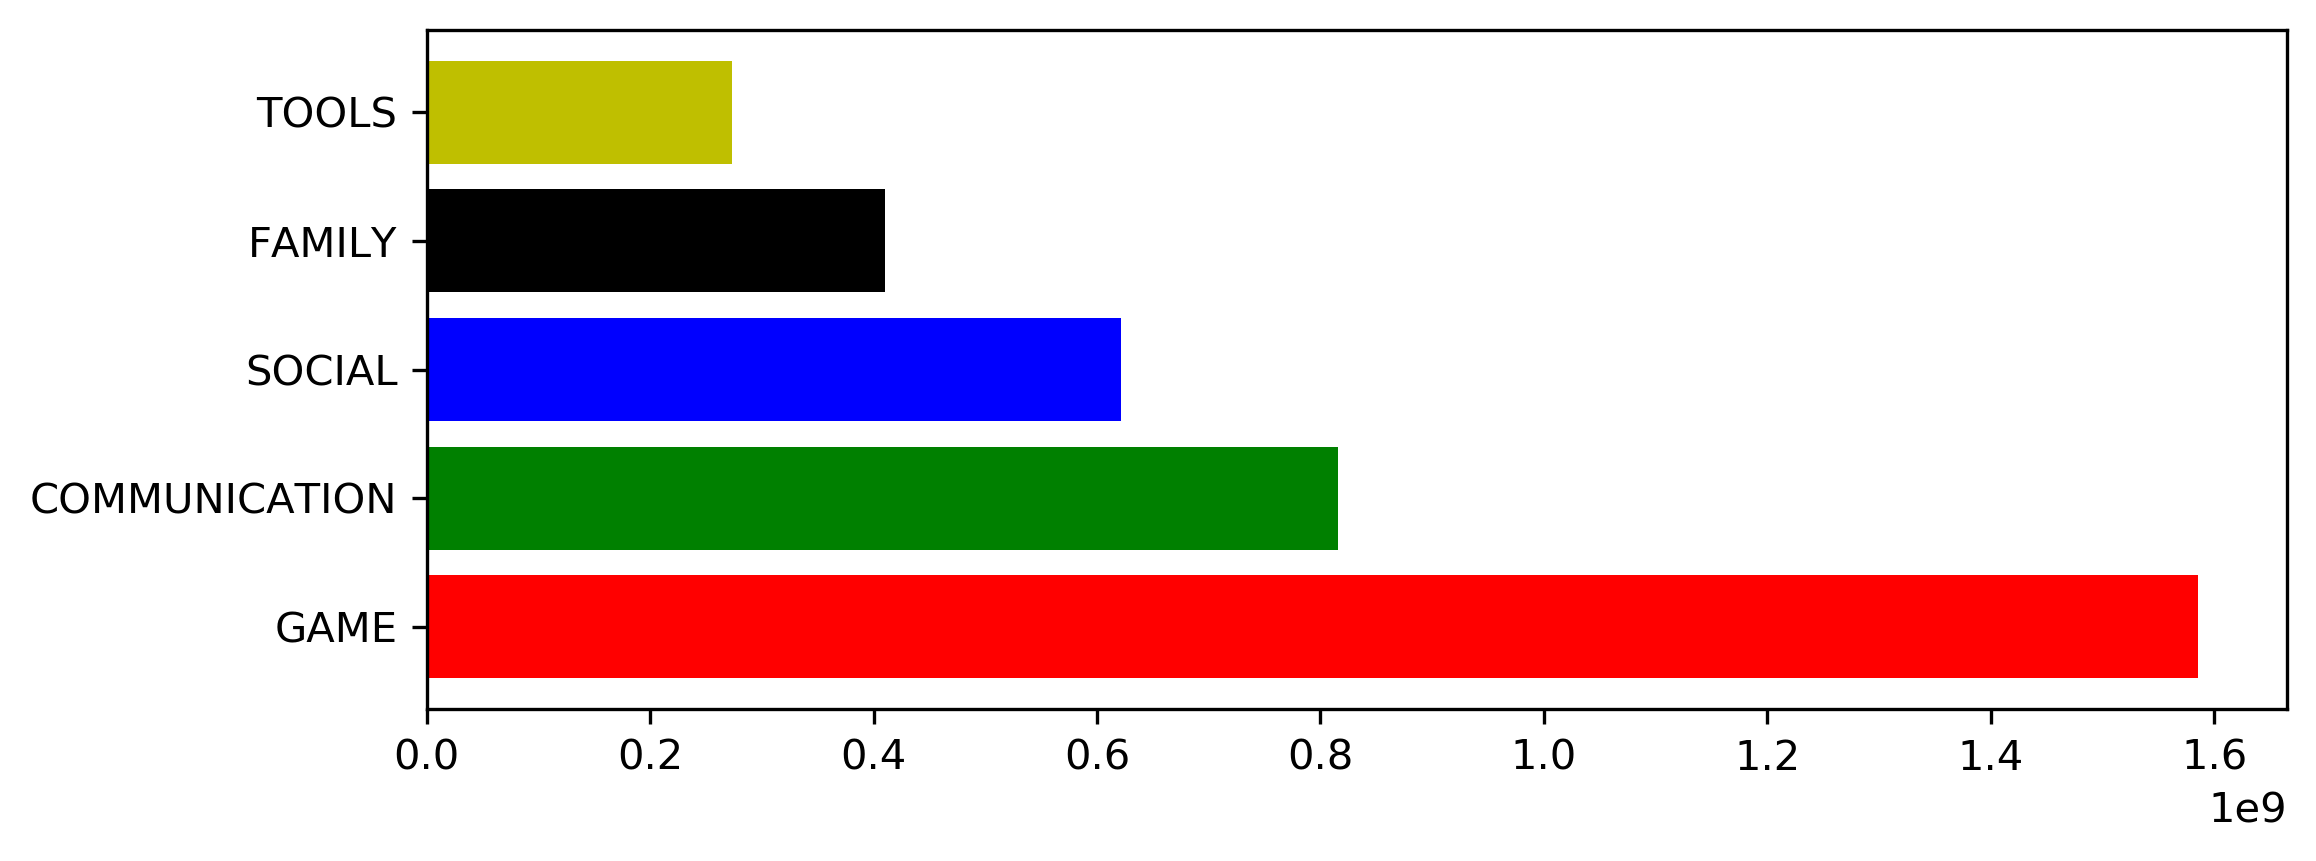

In [29]:
## Bar Plot
## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
cat_order = df2.groupby('Category').agg({'Reviews': 'sum'}).rename({'Reviews':'Total'}, axis=1).sort_values(by='Total', ascending=False).head()
X = cat_order.index
Y = cat_order['Total']

my_colors = 'rgbkymc'

# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X,Y,color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

# bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
# variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
# halaman html
result = str(figdata_png)[2:-1]

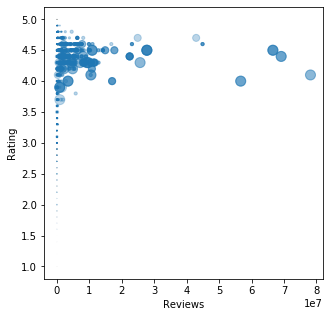

In [30]:
## Scatter Plot
# Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
# Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result2 = str(figdata_png)[2:-1]

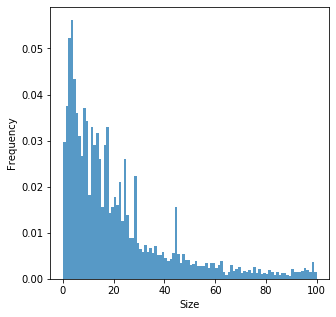

In [31]:
## Histogram Size Distribution
# Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
# Histogram yang terbentuk terbagi menjadi 100 bins
X=(playstore['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

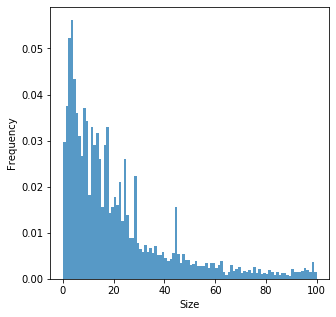

In [32]:
## Histogram Size Distribution
# Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
# Histogram yang terbentuk terbagi menjadi 100 bins
X=(playstore['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result3 = str(figdata_png)[2:-1]

In [33]:
playstore_pvt = playstore.pivot_table(
                    index='Category',
                    columns='Type',
                    values='Price')  
daftar = playstore_pvt.fillna(0).sort_values(by='Paid', ascending=False).drop('Free', axis=1).reindex().head(5)
daftar
label1 = daftar.iloc[0]
label2 = daftar.iloc[1]
label3 = daftar.iloc[2]
label4 = daftar.iloc[3]
label5 = daftar.iloc[4]
labels = (label1, label2, label3, label4, label5)
labels
#label1

(Type
 Paid    170.637059
 Name: FINANCE, dtype: float64,
 Type
 Paid    124.256316
 Name: LIFESTYLE, dtype: float64,
 Type
 Paid    109.99
 Name: EVENTS, dtype: float64,
 Type
 Paid    13.233571
 Name: BUSINESS, dtype: float64,
 Type
 Paid    13.210642
 Name: MEDICAL, dtype: float64)

In [34]:
daftar

Type,Paid
Category,
FINANCE,170.637059
LIFESTYLE,124.256316
EVENTS,109.990000
BUSINESS,13.233571
MEDICAL,13.210642


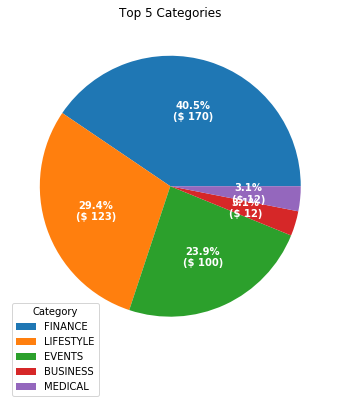

<Figure size 432x288 with 0 Axes>

In [59]:
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

kategori = ["171 FINANCE",
          "124 LIFESTYLE",
          "101 EVENTS",
          "13 BUSINESS",
          "13 MEDICAL"]

data = [float(x.split()[0]) for x in kategori]
ingredients = [x.split()[-1] for x in kategori]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n($ {:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Category",
          loc="center left",
          bbox_to_anchor=(0, 0, 0, 0))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Top 5 Categories")

plt.show()

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result4 = str(figdata_png)[2:-1]

C:\Users\User\anaconda3\envs\padacaps\lib\site-packages\pandas\core\ops\array_ops.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

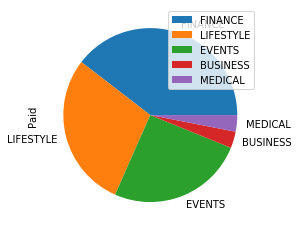

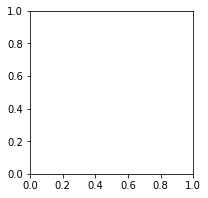

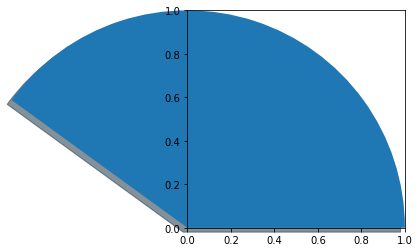

In [37]:
## Buatlah sebuah plot yang menampilkan insight di dalam data 
playstore_pvt = playstore.pivot_table(
                    index='Category',
                    columns='Type',
                    values='Price')  
playstore_pvt.fillna(0).sort_values(by='Paid', ascending=False).drop('Free', axis=1).head(5).plot.pie(subplots=True)
# daftar = playstore_pvt.fillna(0).sort_values(by='Paid', ascending=False).drop('Free', axis=1).reindex().head(5)

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]

#label1 = daftar.iloc[0]
#label2 = daftar.iloc[1]
#label3 = daftar.iloc[2]
#label4 = daftar.iloc[3]
#label5 = daftar.iloc[4]
#labels = (label1, label2, label3, label4, label5)
Labels = ('Finance', 'Lifestyle', 'Events', 'Business', 'Medical' )

X=[40, 29, 25, 3, 3]
#X=[label1, label2, label3, label4, label5]

figpie, ax1 = plt.subplots()
ax1.pie(X, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis('equal')

#X=(playstore['Size']/1000000).values
#fig = plt.figure(figsize=(5,5))
#fig.add_subplot()
#plt.hist(X,bins=100, density=True,  alpha=0.75)
#plt.xlabel('Size')
#plt.ylabel('Frequency')
#plt.savefig('hist_size.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result4 = str(figdata_png)[2:-1]


In [ ]:
stats = {'most_categories' : top_category['Category'].loc[0],
    'total': top_category['Jumlah'].loc[0],
    'rev_table' : df2.groupby(['Category', 'App']).agg({'Reviews':'sum', 'Rating':'mean'}).sort_values(by=['Reviews', 'Category'], ascending=False).head(10).to_html(classes=['table thead-light table-striped table-bordered table-hover table-sm'])
    }
stats